In [1]:
# Import dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

In [2]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [3]:
# Checking the data type and null values on train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12180 entries, 0 to 12179
Data columns (total 84 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   12180 non-null  float64
 1   int_rate                    12180 non-null  float64
 2   installment                 12180 non-null  float64
 3   home_ownership              12180 non-null  object 
 4   annual_inc                  12180 non-null  float64
 5   verification_status         12180 non-null  object 
 6   pymnt_plan                  12180 non-null  object 
 7   dti                         12180 non-null  float64
 8   delinq_2yrs                 12180 non-null  float64
 9   inq_last_6mths              12180 non-null  float64
 10  open_acc                    12180 non-null  float64
 11  pub_rec                     12180 non-null  float64
 12  revol_bal                   12180 non-null  float64
 13  total_acc                   121

In [4]:
# Checking the data type and null values on test_df
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4702 entries, 0 to 4701
Data columns (total 84 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   4702 non-null   float64
 1   int_rate                    4702 non-null   float64
 2   installment                 4702 non-null   float64
 3   home_ownership              4702 non-null   object 
 4   annual_inc                  4702 non-null   float64
 5   verification_status         4702 non-null   object 
 6   pymnt_plan                  4702 non-null   object 
 7   dti                         4702 non-null   float64
 8   delinq_2yrs                 4702 non-null   float64
 9   inq_last_6mths              4702 non-null   float64
 10  open_acc                    4702 non-null   float64
 11  pub_rec                     4702 non-null   float64
 12  revol_bal                   4702 non-null   float64
 13  total_acc                   4702 

In [5]:
# Convert categorical data to numeric and separate target feature for training data
X1=train_df.drop('target',axis=1)
# X_train=pd.get_dummies(X1)
X_train=pd.get_dummies(X1,columns=['home_ownership','verification_status','pymnt_plan','initial_list_status','application_type','hardship_flag','debt_settlement_flag' ],drop_first=True)
y1=train_df['target']
y_train=LabelEncoder().fit_transform(y1)

In [6]:
# Convert categorical data to numeric and separate target feature for testing data
X2=test_df.drop('target',axis=1)
# X_test=pd.get_dummies(X2)
X_test=pd.get_dummies(X2,columns=['home_ownership','verification_status','pymnt_plan','initial_list_status','application_type','hardship_flag','debt_settlement_flag' ],drop_first=True)
y2=test_df['target']
y_test=LabelEncoder().fit_transform(y2)

In [7]:
# add missing dummy variables to testing set

# Get the name of missing columns
missing_cols = set( X_train.columns ) - set( X_test.columns )
print(missing_cols)
# Add the missing columns in the testing set and filling them with 0
for col in missing_cols:
    X_test[col] = 0

# Align the order of the columns in the training and testing sets
X_train, X_test = X_train.align(X_test, axis=1)

# Confirm that the columns are aligned and none is missing
X_train.columns==X_test.columns

{'debt_settlement_flag_Y'}


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

# Unscaled Data

I predict that the Random Forest Classifier will do better than the logistic Regression as given the number of features, it is best to combine a number of decision trees on different subsets of a dataset and averages the results to increase the dataset's predicted accuracy.It will also overcome the problem of decision tree overfitting.



In [8]:
# Train the Logistic Regression model on the unscaled data and print the model score
classifier= LogisticRegression(max_iter=2000,solver='lbfgs').fit(X_train,y_train)

print('Logisitc Regression - Unscaled Data')
print("------------------------------------")
print(f'Training Data Score: {classifier.score(X_train, y_train)}')
print(f'Testing Data Score: {classifier.score(X_test, y_test)}')

Logisitc Regression - Unscaled Data
------------------------------------
Training Data Score: 0.6998357963875205
Testing Data Score: 0.5669927690344534


C:\Users\JINK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# Train a Random Forest Classifier model and print the model score
classifier=RandomForestClassifier(random_state=1,n_estimators=500).fit(X_train,y_train)

print('Random Forest Classifier - Unscaled Data')
print("------------------------------------")
print(f'Training Data Score: {classifier.score(X_train, y_train)}')
print(f'Testing Data Score: {classifier.score(X_test, y_test)}')

Random Forest Classifier - Unscaled Data
------------------------------------
Training Data Score: 1.0
Testing Data Score: 0.638664398128456


# Scaled Data

I predict that the Logistic Regression will do better on the scaled data as it will center the data distribution around 0.

In [10]:
# Scale the data
scaler=StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
# Train the Logistic Regression model on the scaled data and print the model score
classifier= LogisticRegression(max_iter=2000,solver='lbfgs').fit(X_train_scaled,y_train)


print('Logisitc Regression - Scaled Data')
print("------------------------------------")
print(f'Training Data Score: {classifier.score(X_train_scaled, y_train)}')
print(f'Testing Data Score: {classifier.score(X_test_scaled, y_test)}')


Logisitc Regression - Scaled Data
------------------------------------
Training Data Score: 0.7108374384236453
Testing Data Score: 0.7598894087622289


In [12]:
# Train a Random Forest Classifier model on the scaled data and print the model score
classifier=RandomForestClassifier(random_state=1,n_estimators=500).fit(X_train_scaled,y_train)

print('Random Forest Classifier - Scaled Data')
print("------------------------------------")
print(f'Training Data Score: {classifier.score(X_train_scaled, y_train)}')
print(f'Testing Data Score: {classifier.score(X_test_scaled, y_test)}')

Random Forest Classifier - Scaled Data
------------------------------------
Training Data Score: 1.0
Testing Data Score: 0.6384517226712038


# Recap
Logisitc Regression - Unscaled Data
------------------------------------
Training Data Score: 0.6998357963875205

Testing Data Score: 0.5669927690344534


Random Forest Classifier - Unscaled Data
------------------------------------
Training Data Score: 1.0

Testing Data Score: 0.638664398128456


Logisitc Regression - Scaled Data
------------------------------------
Training Data Score: 0.7108374384236453

Testing Data Score: 0.7598894087622289


Random Forest Classifier - Scaled Data
------------------------------------
Training Data Score: 1.0

Testing Data Score: 0.6384517226712038


The results show that the Logisitic Regression does better than the Random Forest Classifier on the scaled data. However, scaling the data didn't really impact the Random Forest Classifier mainly because Random Forest is a tree-based model and not distance based model and hence does not require feature scaling.

# Bonus: Feature Selection

[1.61509763e-02 3.35805288e-02 3.16268677e-02 1.45115439e-02
 1.57130552e-02 2.87178435e-03 4.19946384e-03 8.38440422e-03
 1.34225009e-03 1.50282715e-02 1.12408751e-02 2.98005842e-02
 3.02804259e-02 4.53835987e-02 4.53966730e-02 5.41038094e-02
 5.10787792e-02 1.68753172e-02 0.00000000e+00 0.00000000e+00
 1.04277842e-01 7.18845068e-04 0.00000000e+00 0.00000000e+00
 4.04170581e-03 1.35603230e-02 4.46023025e-03 6.42373938e-03
 3.91310480e-03 5.99590136e-03 1.19732508e-02 1.30974633e-02
 1.39946287e-02 4.92978884e-03 7.68891839e-03 1.53227142e-02
 1.30276246e-02 1.55675281e-02 5.98612508e-03 6.86145744e-03
 7.83168400e-03 9.72864193e-03 1.40962815e-02 1.53225012e-02
 1.40192198e-02 3.03011580e-04 0.00000000e+00 1.54441353e-02
 1.63086290e-02 1.19657273e-02 1.02065226e-02 5.68597468e-03
 1.30362903e-02 1.16591811e-02 3.55828339e-03 7.06582621e-03
 7.87400275e-03 7.05926136e-03 8.44768922e-03 1.01129423e-02
 8.17787432e-03 9.93279460e-03 7.64435112e-03 8.64017503e-03
 0.00000000e+00 0.000000

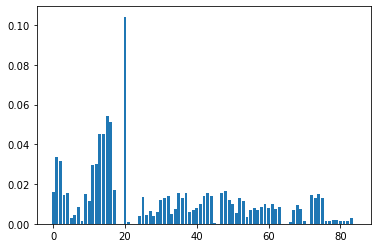

In [13]:
features = classifier.feature_importances_
print(features)
import matplotlib.pyplot as plt
plt.bar(x = range(len(features)), height=features)
plt.show()

In [14]:
sel = SelectFromModel(classifier)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([ True,  True,  True,  True,  True, False, False, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False,  True,  True,  True, False, False,  True,
        True,  True, False, False, False, False,  True,  True,  True,
       False, False,  True,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False])

In [15]:
X_selected_train= sel.transform(X_train)
X_selected_test= sel.transform(X_test)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

C:\Users\JINK\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\JINK\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [16]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.7093596059113301
Testing Score: 0.7735006380263718


C:\Users\JINK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
